# 0.0 IMPORTS

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 0.1 Loadind Data

In [4]:
# Dados de treinamento
df_training_feature = pd.read_csv( '../data/training_set_features.csv', low_memory=False)
df_training_labels = pd.read_csv( '../data/training_set_labels.csv', low_memory=False)

# Dados de teste
df_submission = pd.read_csv( '../data/submission_format.csv', low_memory=False)
df_test = pd.read_csv( '../data/test_set_features.csv', low_memory=False)

# Juntando as informações dos dados de treinamento
df_raw = pd.merge(df_training_feature, df_training_labels, how='left', on='respondent_id')

In [5]:
df_raw.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# 1.0. Passo 1 - DESCRIÇÃO DOS DADOS

## 1.1. Data Dimensions

In [6]:
df1 = df_raw.copy()

In [7]:
print(f'Numero de Linhas: {df1.shape[0]}')
print(f'Numero de Colunas: {df1.shape[1]}')

Numero de Linhas: 26707
Numero de Colunas: 38


## 1.2. Data Types

In [8]:
df1.dtypes.to_frame(name='dtype')

,dtype
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


## 1.3. Check NA

In [9]:
df1.isna().sum().to_frame(name='dtype')

,dtype
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


## 1.4. Fillout NA

In [10]:
df1['employment_occupation'].value_counts(dropna=False, normalize=True)

employment_occupation
NaN         0.504362
xtkaffoo    0.066574
mxkfnird    0.056502
emcorrxb    0.047553
cmhcxjea    0.046692
xgwztkwe    0.040514
hfxkjkmi    0.028682
qxajmpny    0.020519
xqwwgdyp    0.018160
kldqjyjy    0.017561
uqqtjvyb    0.016924
tfqavkke    0.014528
ukymxvdu    0.013929
vlluhbov    0.013255
oijqvulv    0.012881
ccgxvspp    0.012768
bxpfxfdn    0.012394
haliazsg    0.011083
rcertsgn    0.010334
xzmlyyjv    0.009286
dlvbwzss    0.008500
hodpvpew    0.007788
dcjcmpih    0.005542
pvmttkik    0.003669
Name: proportion, dtype: float64

In [11]:
# Variáveis de percepção/opinião --Preenchido com a mediana
df1['h1n1_concern'] = df1['h1n1_concern'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['h1n1_knowledge'] = df1['h1n1_knowledge'].apply( lambda x: 1 if math.isnan( x ) else x )
df1['opinion_h1n1_vacc_effective'] = df1['opinion_h1n1_vacc_effective'].apply( lambda x: 4 if math.isnan( x ) else x )
df1['opinion_h1n1_risk'] = df1['opinion_h1n1_risk'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['opinion_h1n1_sick_from_vacc'] = df1['opinion_h1n1_sick_from_vacc'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['opinion_seas_vacc_effective'] = df1['opinion_seas_vacc_effective'].apply( lambda x: 4 if math.isnan( x ) else x )
df1['opinion_seas_risk'] = df1['opinion_seas_risk'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['opinion_seas_sick_from_vacc'] = df1['opinion_seas_sick_from_vacc'].apply( lambda x: 2 if math.isnan( x ) else x )

# Variáveis comportamentais -- Preenchido com 0 assumindo que o comportamento não foi realizado
df1['behavioral_antiviral_meds'] = df1['behavioral_antiviral_meds'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_avoidance'] = df1['behavioral_avoidance'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_face_mask'] = df1['behavioral_face_mask'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_wash_hands'] = df1['behavioral_wash_hands'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_large_gatherings'] = df1['behavioral_large_gatherings'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_outside_home'] = df1['behavioral_outside_home'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_touch_face'] = df1['behavioral_touch_face'].apply( lambda x: 0 if math.isnan( x ) else x )

# Variáveis de saúde -- Preenchido com a moda
df1['doctor_recc_h1n1'] = df1['doctor_recc_h1n1'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['doctor_recc_seasonal'] = df1['doctor_recc_seasonal'].apply( lambda x: 0 if math.isnan( x ) else x ) 
df1['chronic_med_condition'] = df1['chronic_med_condition'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['child_under_6_months'] = df1['child_under_6_months'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['health_worker'] = df1['health_worker'].apply( lambda x: 0 if math.isnan( x ) else x ) 
df1['health_insurance'] = df1['health_insurance'].apply( lambda x: -1 if math.isnan( x ) else x ) # Criado uma nova categoria para os casos "desconhecido"

# Variáveis Demográficas -- Preenchido com a moda
df1['education'] = df1['education'].apply( lambda x: 'College Graduate' if pd.isna( x ) else x )
df1['income_poverty'] = df1['income_poverty'].apply( lambda x: '<= $75,000, Above Poverty' if pd.isna( x ) else x )
df1['marital_status'] = df1['marital_status'].apply( lambda x: 'Married' if pd.isna( x ) else x )
df1['rent_or_own'] = df1['rent_or_own'].apply( lambda x: 'Own' if pd.isna( x ) else x )
df1['employment_status'] = df1['employment_status'].apply( lambda x: 'Employed' if pd.isna( x ) else x )

# Domicílio -- Preenchido com a mediana
df1['household_adults'] = df1['household_adults'].apply( lambda x: 1 if math.isnan( x ) else x )
df1['household_children'] = df1['household_children'].apply( lambda x: 0 if math.isnan( x ) else x )



In [12]:
df1.isna().sum().to_frame(name='dtype')

,dtype
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


## 1.5. Change Types

In [13]:
df1.dtypes.to_frame(name='dtype')

,dtype
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [14]:
# Variáveis de percepção/opinião
df1['h1n1_concern'] = df1['h1n1_concern'].astype( int )
df1['h1n1_knowledge'] = df1['h1n1_knowledge'].astype( int )
df1['opinion_h1n1_vacc_effective'] = df1['opinion_h1n1_vacc_effective'].astype( int )
df1['opinion_h1n1_risk'] = df1['opinion_h1n1_risk'].astype( int )
df1['opinion_h1n1_sick_from_vacc'] = df1['opinion_h1n1_sick_from_vacc'].astype( int )
df1['opinion_seas_vacc_effective'] = df1['opinion_seas_vacc_effective'].astype( int )
df1['opinion_seas_risk'] = df1['opinion_seas_risk'].astype( int )
df1['opinion_seas_sick_from_vacc'] = df1['opinion_seas_sick_from_vacc'].astype( int )

# Variáveis comportamentais
df1['behavioral_antiviral_meds'] = df1['behavioral_antiviral_meds'].astype( int )
df1['behavioral_avoidance'] = df1['behavioral_avoidance'].astype( int )
df1['behavioral_face_mask'] = df1['behavioral_face_mask'].astype( int )
df1['behavioral_wash_hands'] = df1['behavioral_wash_hands'].astype( int )
df1['behavioral_large_gatherings'] = df1['behavioral_large_gatherings'].astype( int )
df1['behavioral_outside_home'] = df1['behavioral_outside_home'].astype( int )
df1['behavioral_touch_face'] = df1['behavioral_touch_face'].astype( int )

# Variáveis de saúde -- Preenchido com a moda
df1['doctor_recc_h1n1'] = df1['doctor_recc_h1n1'].astype( int )
df1['doctor_recc_seasonal'] = df1['doctor_recc_seasonal'].astype( int ) 
df1['chronic_med_condition'] = df1['chronic_med_condition'].astype( int )
df1['child_under_6_months'] = df1['child_under_6_months'].astype( int )
df1['health_worker'] = df1['health_worker'].astype( int ) 
df1['health_insurance'] = df1['health_insurance'].astype( int )

# Domicílio -- Preenchido com a mediana
df1['household_adults'] = df1['household_adults'].astype( int )
df1['household_children'] = df1['household_children'].astype( int )

In [15]:
df1.dtypes.to_frame(name='dtype')

,dtype
respondent_id,int64
h1n1_concern,int64
h1n1_knowledge,int64
behavioral_antiviral_meds,int64
behavioral_avoidance,int64
behavioral_face_mask,int64
behavioral_wash_hands,int64
behavioral_large_gatherings,int64
behavioral_outside_home,int64
behavioral_touch_face,int64


## 1.6. Descriptive Statistical

### 1.6.1. Numerical Attributes

In [16]:
df1.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.719961,0.068933,0.824316,0.357472,0.336279,0.674018,0.202494,0.303067,0.272962,0.080054,0.108548,0.015839,3.852810,2.337589,2.352380,4.025536,2.705321,2.115737,0.887558,0.529599,0.212454,0.465608
std,7709.791156,0.909016,0.617047,0.215273,0.449026,0.253345,0.380558,0.479264,0.472444,0.468749,0.401866,0.459592,0.445490,0.271382,0.311077,0.966841,1.000195,1.276825,1.353339,1.077131,1.375216,1.319585,0.749980,0.925264,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


### 1.6.2. Categorical Attributes

In [17]:
df1.describe(include=['object'])

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,11504,21222,15858,17200,14963,20778,15023,4297,11645,2468,1778


In [18]:
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [19]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      22
employment_occupation    24
dtype: int64

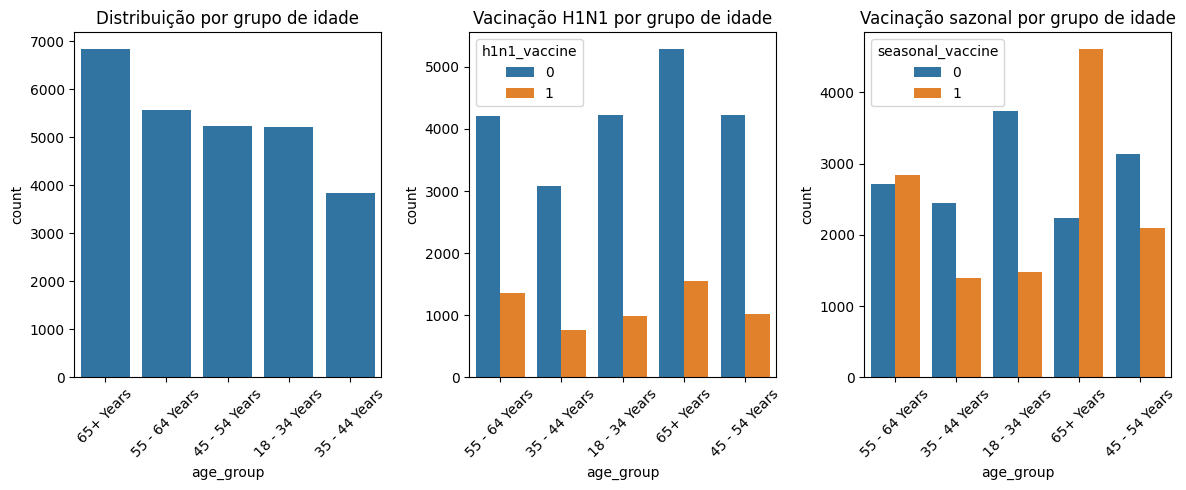

In [ ]:
# age_group
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='age_group', order=df1['age_group'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuição por grupo de idade')


plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='age_group', hue='h1n1_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação H1N1 por grupo de idade')

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='age_group', hue='seasonal_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação sazonal por grupo de idade')

plt.tight_layout()
plt.show()

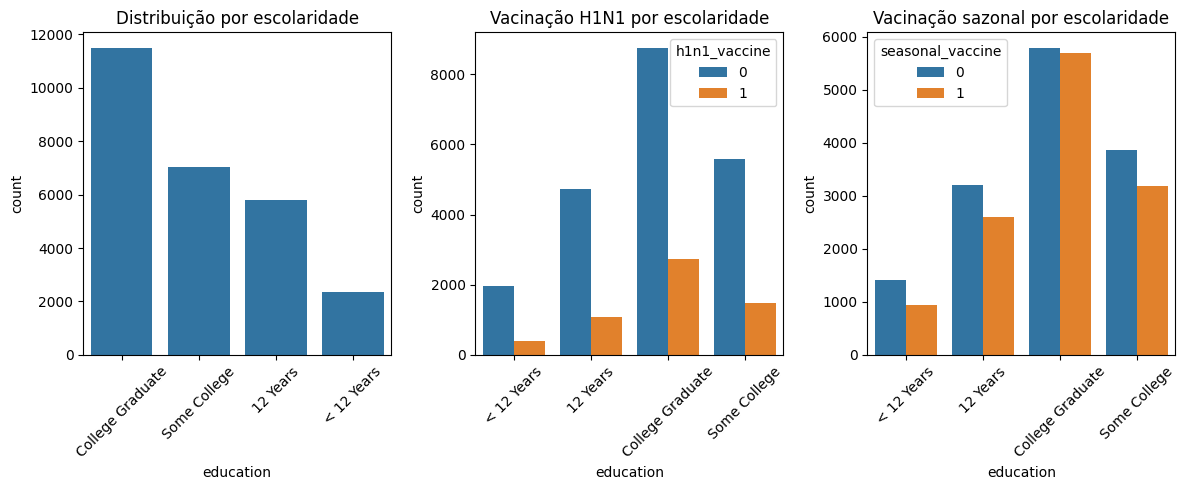

In [30]:
# education
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='education', order=df1['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuição por escolaridade')


plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='education', hue='h1n1_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação H1N1 por escolaridade')

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='education', hue='seasonal_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação sazonal por escolaridade')

plt.tight_layout()
plt.show()